In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv('filtered.csv')

In [4]:
#choose relevant columns
#get dummy data
#train test split
#multiple linear regression
#lasso regression
#random forest
#tune using gridsearchcv
#test ensambles

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Min Salary', 'Max Salary',
       'Average Salary', 'Job State', 'Age', 'Python', 'Spark',
       'Job Simplified', 'Seniority', 'Description Length'],
      dtype='object')

In [15]:
df_model = df[['Average Salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Salary Estimate', 'Job State', 'Age', 'Python', 'Spark','Job Simplified', 'Seniority', 'Description Length']]

In [16]:
df_dum = pd.get_dummies(df_model)

In [17]:
X = df_dum.drop('Average Salary', axis=1)
y = df_dum['Average Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#linear regression
X_sm = X = sm.add_constant(X)

In [26]:
model = sm.OLS(y,X_sm)

In [27]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.940e+23
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:34:48   Log-Likelihood:                 15058.
No. Observations:                 681   AIC:                        -2.938e+04
Df Residuals:                     313   BIC:                        -2.772e+04
Df Model:                         367                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                40.0261   2.95e-10   1.36e+11      0.000      40.026      40.026
Rating                                                5.8351   3.12e-11   1.87e+11      0.000       5.835       5.835
Age                                                   0.0139   7.45e-13   1.87e+10      0.000       0.014       0.014
Python                                                5.7135    7.2e-11   7.93e+10      0.000       5.713       5.713
Spark                                                -5.7135   6.29e-11  -9.08e+10      0.000      -5.713      -5.713
Description Length                                -1.379e-14   1.24e-13     -0.112      0.911   -2.57e-13     2.3e-13
Size_-1                                               7.7166   1.25e-10   6.19e+10      0.000       7.717       7.717
Size_1 to 50 Employees                                2.8821   8.66e-11   3.33e+10      0.000       2.882       2.882
Size_10000+ Employees                                -3.0447   8.56e-11  -3.56e+10      0.000      -3.045      -3.045
Size_1001 to 5000 Employees                          13.6126   6.66e-11   2.04e+11      0.000      13.613      13.613
Size_201 to 500 Employees                            12.5175   4.63e-11   2.71e+11      0.000      12.517      12.517
Size_5001 to 10000 Employees                         21.6497   1.09e-10   1.98e+11      0.000      21.650      21.650
Size_501 to 1000 Employees                            3.8605   1.26e-10   3.06e+10      0.000       3.861       3.861
Size_51 to 200 Employees                              6.5298   7.76e-11   8.42e+10      0.000       6.530       6.530
Size_Unknown                                        -25.6980   1.93e-10  -1.33e+11      0.000     -25.698     -25.698
Type of ownership_-1                                  7.7166   1.25e-10   6.19e+10      0.000       7.717       7.717
Type of ownership_College / University               11.7744   2.22e-10    5.3e+10      0.000      11.774      11.774
Type of ownership_Company - Private                  -1.8841   3.49e-11   -5.4e+10      0.000      -1.884      -1.884
Type of ownership_Company - Public                    7.4522   3.93e-11    1.9e+11      0.000       7.452       7.452
Type of ownership_Contract                            4.5211   1.39e-10   3.26e+10      0.000       4.521       4.521
Type of ownership_Government                         -3.1076   3.69e-10  -8.43e+09      0.000      -3.108      -3.108
Type of ownership_Hospital                           -1.8970   9.17e-11  -2.07e+10      0.000      -1.897      -1.897
Type of ownership_Nonprofit Organization             -8.3154    7.1e-11  -1.17e+11      0.000      -8.315      -8.315
Type of ownersh

In [34]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
np.mean(cross_val_score(lm,X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-11.224981737585594

In [35]:
lm_l = Lasso()

In [56]:
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l,X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-15.881889530178578

In [43]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

C:\Users\salar.ahmad\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9153.91793365409, tolerance: 28.65526553867403
  model = cd_fast.enet_coordinate_descent(
C:\Users\salar.ahmad\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.034932140153614, tolerance: 28.65526553867403
  model = cd_fast.enet_coordinate_descent(


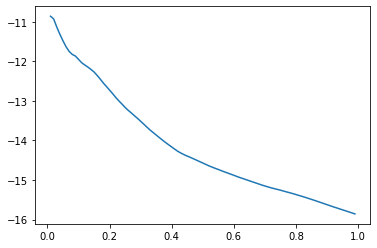

In [44]:
plt.plot(alpha, error)

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor()

In [49]:
np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-10.372767338554631

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [52]:
gs = GridSearchCV(rf, parameters,scoring='neg_mean_absolute_error',cv=3)

In [53]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [54]:
gs.best_score_

-10.108700047650323

In [55]:
gs.best_estimator_

RandomForestRegressor(n_estimators=110)

In [60]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [62]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, tpred_lm))
print(mean_absolute_error(y_test, tpred_lml))
print(mean_absolute_error(y_test, tpred_rf))

13.403567196563827
16.578797227851766
10.907631055076312
